<a href="https://colab.research.google.com/github/knightligh/AI/blob/main/DC_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=91a4482ff9b791a4f6bd264d92148a0aeb8c0b787894d404941304235130f703
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


143.3877379330889


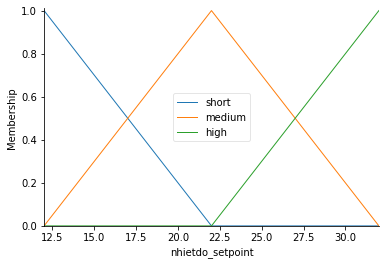

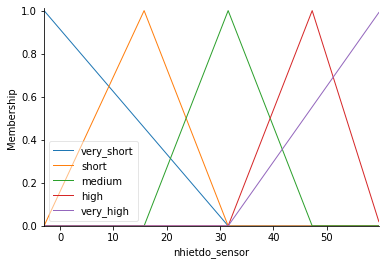

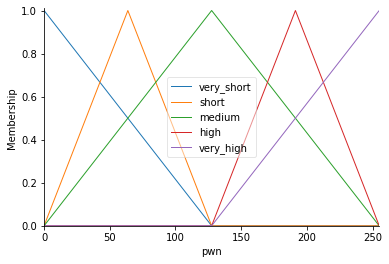

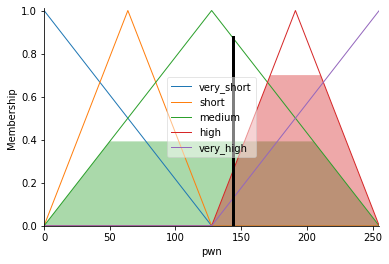

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
#-----------data input---------
nhietdo_setpoint=ctrl.Antecedent(np.arange(12,33,1),'nhietdo_setpoint')
nhietdo_sensor=ctrl.Antecedent(np.arange(-3,60,0.25),'nhietdo_sensor')


#-----------data output-------
pwn=ctrl.Consequent(np.arange(0,255,0.25),'pwn')

nhietdo_setpoint['short']=fuzz.trimf(nhietdo_setpoint.universe,[12,12,22])
nhietdo_setpoint['medium']=fuzz.trimf(nhietdo_setpoint.universe,[12,22,32])
nhietdo_setpoint['high']=fuzz.trimf(nhietdo_setpoint.universe,[22,32,32])


nhietdo_sensor['very_short']=fuzz.trimf(nhietdo_sensor.universe,[-3,-3,31.5])
nhietdo_sensor['short']=fuzz.trimf(nhietdo_sensor.universe,[-3,15.75,31.5])
nhietdo_sensor['medium']=fuzz.trimf(nhietdo_sensor.universe,[15.75,31.5,47.25])
nhietdo_sensor['high']=fuzz.trimf(nhietdo_sensor.universe,[31.5,47.25,60])
nhietdo_sensor['very_high']=fuzz.trimf(nhietdo_sensor.universe,[31.5,60,60])


pwn['very_short']=fuzz.trimf(pwn.universe,[0,0,127.5])
pwn['short']=fuzz.trimf(pwn.universe,[0,63.75,127.5])
pwn['medium']=fuzz.trimf(pwn.universe,[0,127.5,255])
pwn['high']=fuzz.trimf(pwn.universe,[127.5,191.25,255])
pwn['very_high']=fuzz.trimf(pwn.universe,[127.5,255,255])

#--------------rule----------
rule1=ctrl.Rule(nhietdo_setpoint['short']&nhietdo_sensor['very_short'],pwn['very_short'])
rule2=ctrl.Rule(nhietdo_setpoint['short']&nhietdo_sensor['short'],pwn['short'])
rule3=ctrl.Rule(nhietdo_setpoint['short']&nhietdo_sensor['medium'],pwn['short'])
rule4=ctrl.Rule(nhietdo_setpoint['short']&nhietdo_sensor['high'],pwn['medium'])
rule5=ctrl.Rule(nhietdo_setpoint['short']&nhietdo_sensor['very_high'],pwn['medium'])

rule6=ctrl.Rule(nhietdo_setpoint['medium']&nhietdo_sensor['very_short'],pwn['very_short'])
rule7=ctrl.Rule(nhietdo_setpoint['medium']&nhietdo_sensor['short'],pwn['short'])
rule8=ctrl.Rule(nhietdo_setpoint['medium']&nhietdo_sensor['medium'],pwn['medium'])
rule9=ctrl.Rule(nhietdo_setpoint['medium']&nhietdo_sensor['high'],pwn['medium'])
rule10=ctrl.Rule(nhietdo_setpoint['medium']&nhietdo_sensor['very_high'],pwn['high'])


rule11=ctrl.Rule(nhietdo_setpoint['high']&nhietdo_sensor['very_short'],pwn['medium'])
rule12=ctrl.Rule(nhietdo_setpoint['high']&nhietdo_sensor['short'],pwn['medium'])
rule13=ctrl.Rule(nhietdo_setpoint['high']&nhietdo_sensor['medium'],pwn['medium'])
rule14=ctrl.Rule(nhietdo_setpoint['high']&nhietdo_sensor['high'],pwn['high'])
rule15=ctrl.Rule(nhietdo_setpoint['high']&nhietdo_sensor['very_high'],pwn['high'])

pwn_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwning=ctrl.ControlSystemSimulation(pwn_ctrl)
pwning.input['nhietdo_setpoint']=25
pwning.input['nhietdo_sensor']=55
pwning.compute()
print(pwning.output['pwn'])
pwn.view(sim=pwning)

